# Exploratory Data Analysis Project


This following project is to respond to the next questions, 
Which are the top rated exercises among the ones provided?
Which are the most popular exercises according to each type of training?
What is the exercise of choice for each category?

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [233]:
full_df = pd.read_csv('gym_data.csv')
full_df.head()
sns.set_theme(style='whitegrid')
sns.set_palette('YlGnBu')

There is an unnecesary column, unnamed:0


In [234]:
full_df = full_df.drop(columns='Unnamed: 0',axis=0)
#Now I see the usual steps in EDA.
missing_values = full_df.isnull().sum()
print(missing_values) #only missing in Desc, we will count with title and equipment is ok to have some null values.

Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64


In [235]:
full_df.dtypes
#only numerical is rating and its one to two.

Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

full count

In [236]:
print("Row count:\t" + str(full_df.shape[0]))
print("Col count:\t" + str(full_df.shape[1]))


Row count:	2918
Col count:	8


# Exploratory data analysis

       BodyPart    Rating
0         Traps  8.018750
1        Biceps  7.654545
2      Forearms  7.433333
3       Triceps  6.822727
4   Middle Back  6.611364
5          Neck  6.550000
6          Lats  6.291111
7    Abdominals  6.286607
8        Calves  6.257692
9     Shoulders  6.185106
10        Chest  6.081416
11       Glutes  5.980000
12   Lower Back  5.680000
13    Abductors  5.190000
14   Hamstrings  5.143529
15    Adductors  4.823077
16   Quadriceps  4.591743


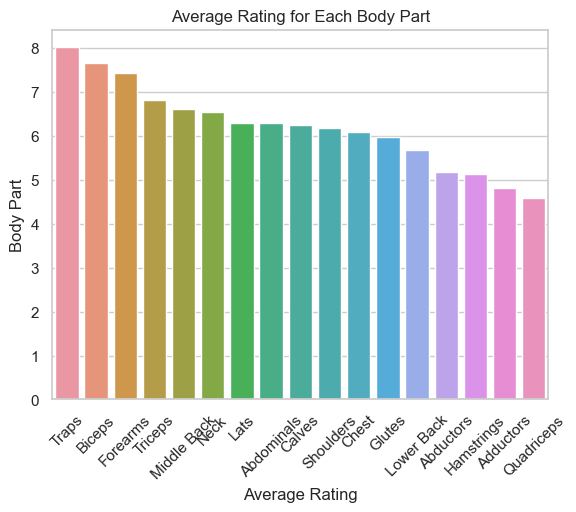

In [237]:
full_df_nona = full_df.dropna(subset=['Rating']).reset_index()
full_df_nona = full_df_nona.drop('index',axis=1)
# Calculate the weighted average rating for each body part
mean_ratings_bp = full_df_nona.groupby('BodyPart')['Rating'].mean().sort_values(ascending=False).reset_index()
print(mean_ratings_bp)
sns.barplot(x='BodyPart',y='Rating',data=mean_ratings_bp)
plt.xticks(rotation=45)
plt.xlabel('Average Rating')
plt.ylabel('Body Part')
plt.title('Average Rating for Each Body Part')
plt.show()

It is observed that the preferred exercises which were rated are the ones involving the arms, primarily traps,biceps, forearms and triceps. Perhaps unsurpisingly, the leg exercises are the worst rated among the bodyparts analysed (never skip leg day).


We can see in this dataset which bodyparts are prioritized between different types of training

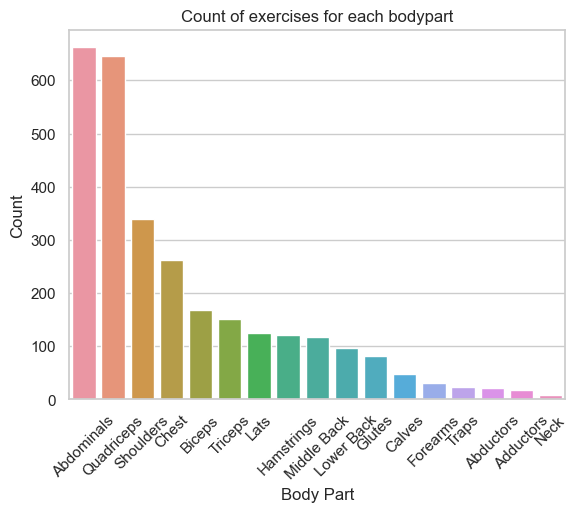

In [238]:
count_exercises = full_df.groupby(['BodyPart']).count().sort_values(by='Title',ascending=False).reset_index()
sns.barplot(x='BodyPart',y='Title',data=count_exercises)
plt.xticks(rotation=45)
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.title('Count of exercises for each bodypart')
plt.show()

In the depicted figure, it is evident that exercises targeting abdominals, quadriceps, and shoulders stand out as the most popular. Conversely, on the right side, abductors, adductors, and neck exercises emerge as the least favored among the presented options.

We can analyse the equipment used for the top 3 exercises in the dataset

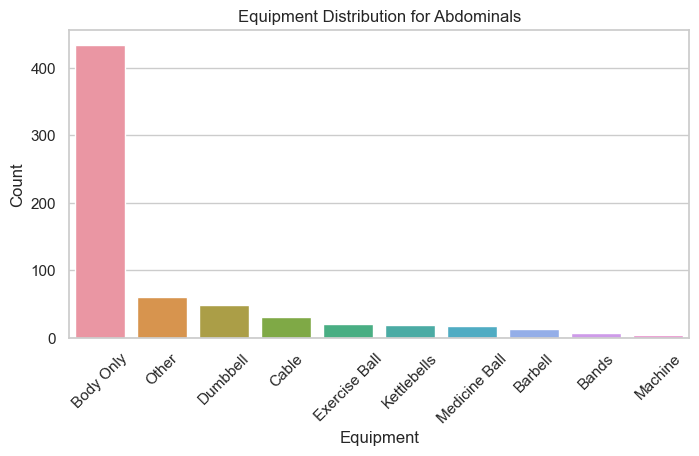

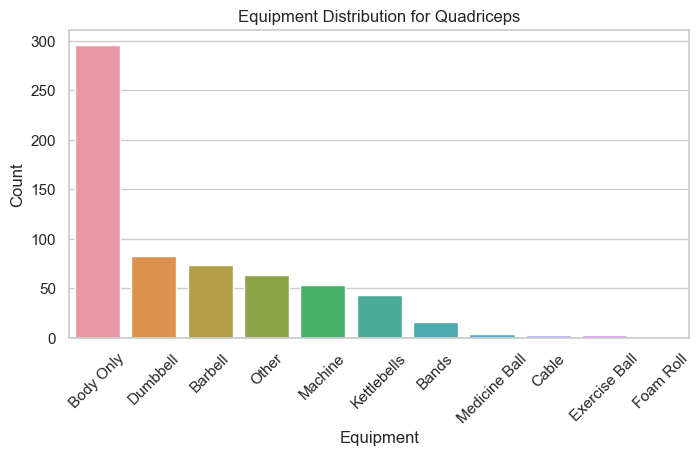

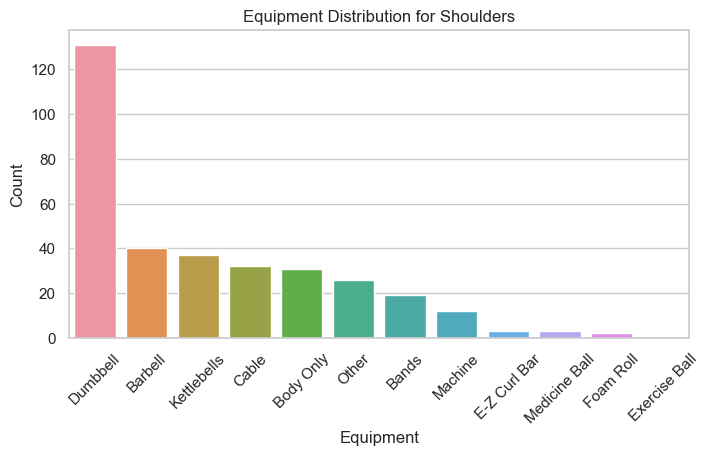

In [239]:
equip_bodpart = full_df.groupby(['BodyPart', 'Equipment']).size().reset_index(name='Count')

# Get the top 3 most popular 'BodyPart' categories
top_bodyparts = equip_bodpart.groupby('BodyPart')['Count'].sum().nlargest(3).index
# Create separate bar plots for the top 3 most popular 'BodyPart' categories
for bodypart in top_bodyparts:
    equip_bodpart_subset = equip_bodpart[equip_bodpart['BodyPart'] == bodypart]
    equip_bodpart_subset = equip_bodpart_subset.sort_values(by='Count',ascending=False)
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Equipment', y='Count', data=equip_bodpart_subset)
    plt.xlabel('Equipment')
    plt.ylabel('Count')
    plt.title(f'Equipment Distribution for {bodypart}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

The top three most popular exercises include bodyweight exercises for abdominals and quadriceps, along with dumbbell-based exercises for shoulders. Notably, dumbbells consistently appear in the top three across all three exercises, underscoring their widespread popularity and effectiveness in various workout routines.

In [240]:
print(full_df['Type'].value_counts())

# Filter for exercises with a rating higher than 9
top_rated_exc = full_df[full_df['Rating'] > 9]

# Group by 'Type' and 'Title', calculate the mean rating for each exercise
top_rated_exc_grouped = top_rated_exc.groupby(['Type', 'Title'])['Rating'].mean().reset_index(name='AvgRating')

# Sort the result by rating in descending order
top_rated_exc_sorted = top_rated_exc_grouped.sort_values(by='AvgRating', ascending=False)

# Print the top-rated exercise for each specific type
types_to_print = ['Strength', 'Powerlifting', 'Strongman']

for exercise_type in types_to_print:
    top_rated_type = top_rated_exc_sorted[top_rated_exc_sorted['Type'] == exercise_type].reset_index()
    print(f"Top-rated {exercise_type} exercise:")
    print(top_rated_type.iloc[0,:].loc['Title'])
    print()

Type
Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: count, dtype: int64
Top-rated Strength exercise:
Single-Leg Press

Top-rated Powerlifting exercise:
Barbell glute bridge

Top-rated Strongman exercise:
Rickshaw Carry



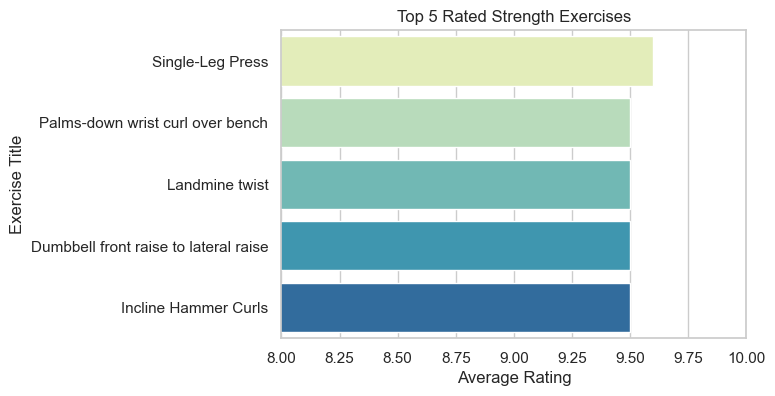

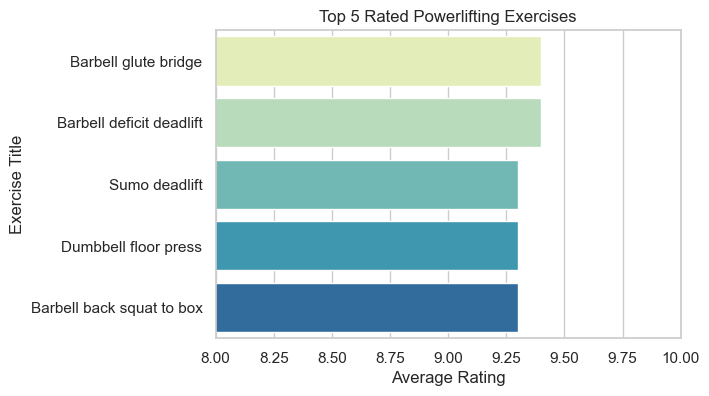

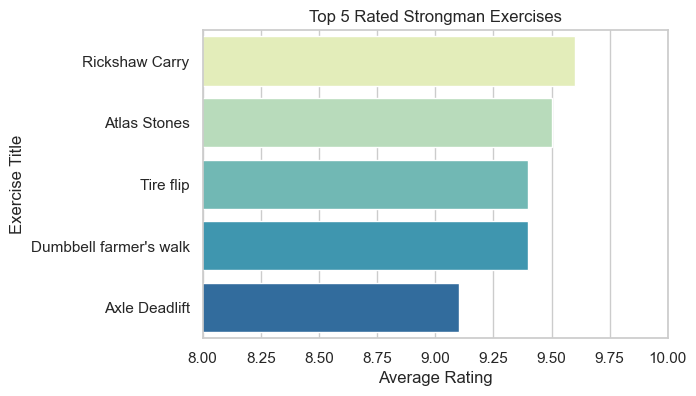

In [241]:
# Filter for exercises with a rating higher than 9
top_rated_exc = full_df[full_df['Rating'] > 9]

# Group by 'Type' and 'Title', calculate the mean rating for each exercise
top_rated_exc_grouped = top_rated_exc.groupby(['Type', 'Title'])['Rating'].mean().reset_index(name='AvgRating')

# Sort the result by rating in descending order
top_rated_exc_sorted = top_rated_exc_grouped.sort_values(by='AvgRating', ascending=False)

# Define the types to plot
types_to_plot = ['Strength', 'Powerlifting', 'Strongman']

# Plot the top 5 rated exercises for each type
for exercise_type in types_to_plot:
    top_rated_type = top_rated_exc_sorted[top_rated_exc_sorted['Type'] == exercise_type].nlargest(5, 'AvgRating')
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x='AvgRating', y='Title', data=top_rated_type)
    plt.xlabel('Average Rating')
    plt.ylabel('Exercise Title')
    plt.title(f'Top 5 Rated {exercise_type} Exercises')
    plt.xlim(8,10)
    plt.show()

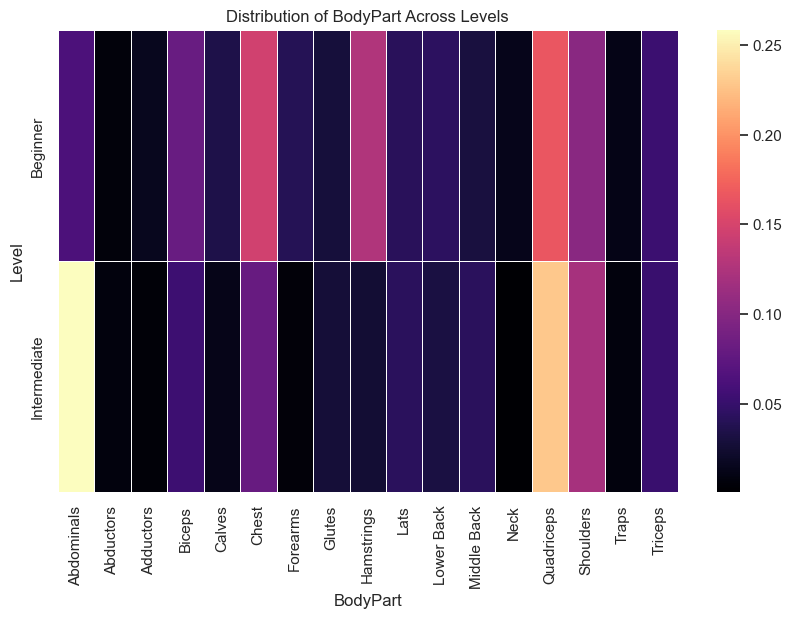

In [242]:
exer_level = pd.crosstab(full_df['Level'], full_df['BodyPart'],normalize='index')
exer_level = exer_level.drop('Expert',axis=0)
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(exer_level, fmt=".0f", linewidths=.5,cmap='magma')
plt.title('Distribution of BodyPart Across Levels')
plt.xlabel('BodyPart')
plt.ylabel('Level')
plt.show()